In [1]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

analysis_data = pd.read_csv("data_all.csv")

analysis_data = analysis_data.dropna()

analysis_data = pd.factorize(analysis_data)

# Load your data into X (features) and y (target) variables
X = analysis_data.iloc[:, 19].values.reshape(-1, 1)

# y is everything else
y = analysis_data.drop(analysis_data.columns[19], axis=1)
print(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regression model
# You can adjust the alpha parameter to control the amount of regularization (default is 1.0)
lasso = Lasso(alpha=1.0)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f'Mean Squared Error: {mse}')

# To access the model's coefficients and intercept:
coefficients = lasso.coef_
intercept = lasso.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


/var/folders/dd/yhrnhz2n28v4fztvybnfbv240000gn/T/ipykernel_75588/3359248421.py:13: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  analysis_data = pd.factorize(analysis_data)


ValueError: could not broadcast input array from shape (13920,23) into shape (13920,)

In [4]:
data = pd.read_csv("resultdat.csv")
data['county'], mapping_index = pd.factorize(data['county'])
data['region'], mapping_index = pd.factorize(data['region'])
data = data[['county', 'Population', 'pop_dens', 'Minority_pct', 'region', 'poverty_level', 'voter_turnout', 'acs_education', 'crime_per_100k', 'rucc', 'hotspot_prop']]

# Load your data into X (features) and y (target) variables
X = data.iloc[:, :-1]  # all columns except the last one
y = data.iloc[:, -1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso regression model
# You can adjust the alpha parameter to control the amount of regularization (default is 1.0)
lasso = Lasso(alpha=1.0)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f'Mean Squared Error: {mse}')

# To access the model's coefficients and intercept:
coefficients = lasso.coef_
intercept = lasso.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

feature_names = X_train.columns

# Mapping coefficients to feature names
coeff_dict = dict(zip(feature_names, lasso.coef_))

# Printing coefficients next to feature names
for feature, coeff in coeff_dict.items():
    print(f'{feature}: {coeff}')

# Number of samples (n) and features (p)
n_samples, n_features = X_train.shape
print(f'Number of samples (n): {n_samples}')
print(f'Number of features (p): {n_features}')

# Regularization parameter (lambda)
# In scikit-learn, lambda (alpha) is set using the 'alpha' parameter in Lasso
lasso_alpha = lasso.alpha_
print(f'Regularization parameter (lambda): {lasso_alpha}')

# Feature names
feature_names = X_train.columns

# Mapping coefficients to feature names
coeff_dict = dict(zip(feature_names, lasso.coef_))

# Printing coefficients next to feature names
for feature, coeff in coeff_dict.items():
    print(f'{feature}: {coeff}')


Mean Squared Error: 0.010520001438763393
Coefficients: [ 0.00000000e+00  5.97349679e-08 -2.71079148e-05 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.03174095e-05 -0.00000000e+00]
Intercept: 0.7149802048480813
county: 0.0
Population: 5.973496786568751e-08
pop_dens: -2.7107914772857273e-05
Minority_pct: -0.0
region: -0.0
poverty_level: -0.0
voter_turnout: 0.0
acs_education: -0.0
crime_per_100k: 1.0317409511761103e-05
rucc: -0.0
Number of samples (n): 80
Number of features (p): 10


AttributeError: 'Lasso' object has no attribute 'alpha_'

In [3]:


# Load your data
data = pd.read_csv("resultdat.csv")

# Factorize categorical variables
data['county'], _ = pd.factorize(data['county'])
data['region'], _ = pd.factorize(data['region'])

# Select features and target
data = data[['county', 'Population', 'pop_dens', 'Minority_pct', 'region', 'poverty_level', 'voter_turnout', 'acs_education', 'crime_per_100k', 'rucc', 'hotspot_prop']]
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]    # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lasso.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print mean squared error
print(f'Mean Squared Error: {mse}')

# Print model coefficients and intercept
coefficients = lasso.coef_
intercept = lasso.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Number of samples (n) and features (p)
n_samples, n_features = X_train.shape
print(f'Number of samples (n): {n_samples}')
print(f'Number of features (p): {n_features}')

# Regularization parameter (lambda)
# In scikit-learn, lambda (alpha) is set using the 'alpha' parameter in Lasso
lasso_alpha = lasso.alpha_
print(f'Regularization parameter (lambda): {lasso_alpha}')

# Feature names
feature_names = X_train.columns

# Mapping coefficients to feature names
coeff_dict = dict(zip(feature_names, lasso.coef_))

# Printing coefficients next to feature names
for feature, coeff in coeff_dict.items():
    print(f'{feature}: {coeff}')


Mean Squared Error: 0.010892742431250001
Coefficients: [ 0.  0.  0. -0. -0. -0.  0. -0.  0. -0.]
Intercept: 0.7365325
Number of samples (n): 80
Number of features (p): 10


AttributeError: 'Lasso' object has no attribute 'alpha_'

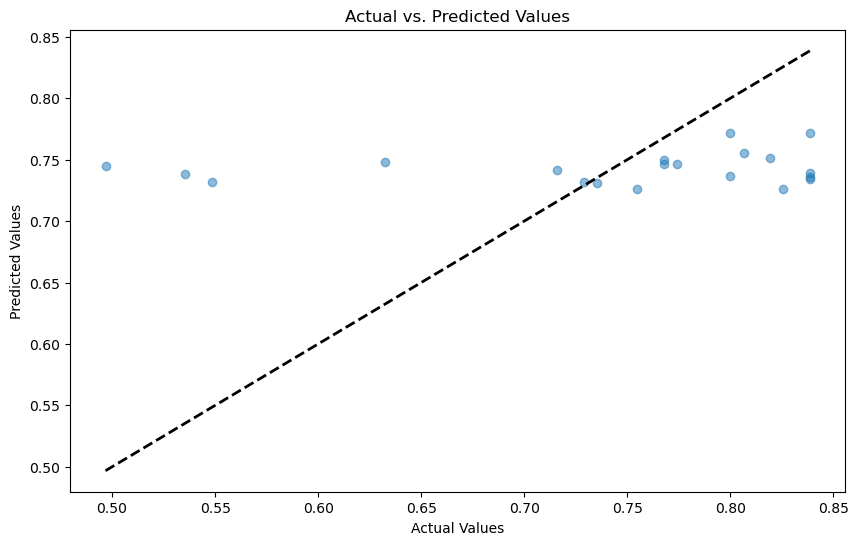

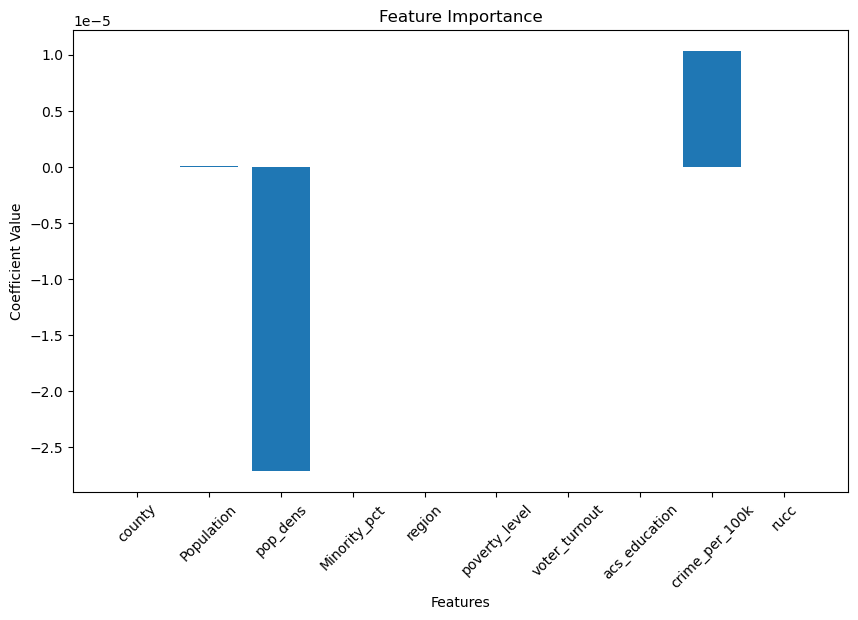

In [24]:
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line
plt.show()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.title('Feature Importance')
plt.show()

Mean Squared Error: 0.26986212052178565
Coefficients: [ 9.11184630e-06 -0.00000000e+00  3.75949651e-04 -7.31720542e-07
 -0.00000000e+00 -1.30759435e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
Intercept: 1.7418260512348414
cases: 9.111846299322449e-06
county: -0.0
date_number: 0.00037594965122241826
Population: -7.317205415539637e-07
region: -0.0
pop_dens: -0.00013075943470314732
crime_per_100k: -0.0
tranlevel: 0.0
Longitude: -0.0
Latitude: -0.0


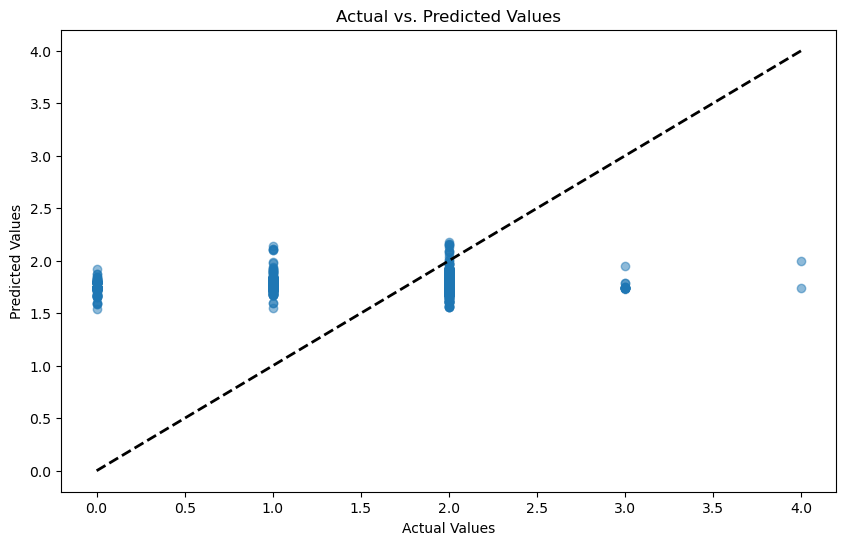

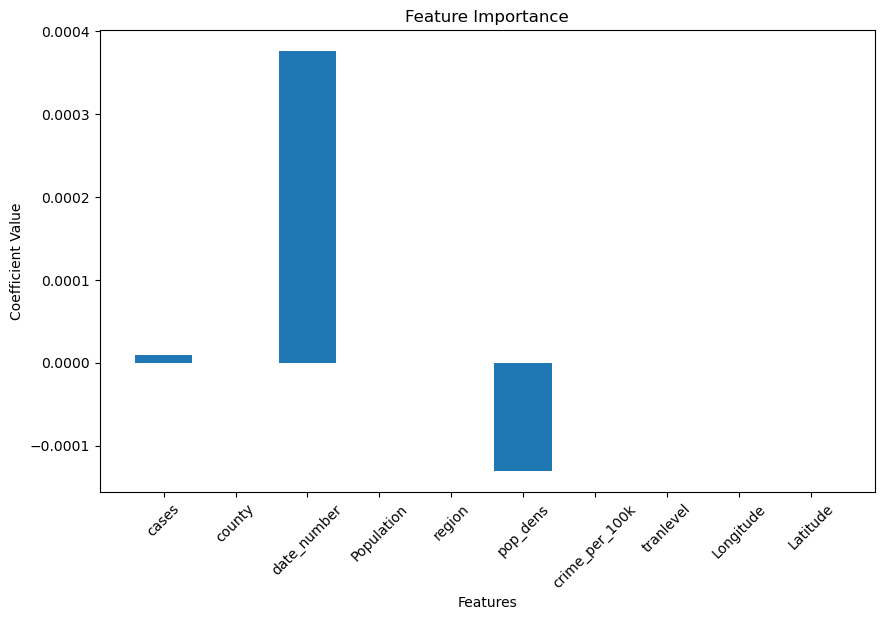

In [3]:
data = pd.read_csv("data_412.csv")
data['county'], mapping_index = pd.factorize(data['county'])
data['region'], mapping_index = pd.factorize(data['region'])
data['tranlevel'], mapping_index = pd.factorize(data['tranlevel'])
data['tranlevel_in_2_weeks'], mapping_index = pd.factorize(data['tranlevel_in_2_weeks'])

data = data[["cases", "county", "date_number", "Population", "region", "pop_dens","crime_per_100k", 'tranlevel', "Longitude", "Latitude", 'tranlevel_in_2_weeks']]

# Load your data into X (features) and y (target) variables
X = data.iloc[:, :-1]  # all columns except the last one
y = data.iloc[:, -1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso regression model
# You can adjust the alpha parameter to control the amount of regularization (default is 1.0)
lasso = Lasso(alpha=1.0)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f'Mean Squared Error: {mse}')

# To access the model's coefficients and intercept:
coefficients = lasso.coef_
intercept = lasso.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

feature_names = X_train.columns

# Mapping coefficients to feature names
coeff_dict = dict(zip(feature_names, lasso.coef_))

# Printing coefficients next to feature names
for feature, coeff in coeff_dict.items():
    print(f'{feature}: {coeff}')
    
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line
plt.show()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.title('Feature Importance')
plt.show()


In [4]:
analysis_data.head()

,Unnamed: 0.1,Unnamed: 0,fips,cases,deaths,Population,casesprop,deathsprop,dailycase,weeklycase,...,tranlevel_Low,tranlevel_Moderate,tranlevel_Substantial,region_Central,region_Coastal,region_Eastern,region_Northern,region_Western,Hotspot_in_2_weeks_False,Hotspot_in_2_weeks_True
0,0,0,37001.0,19035,289.0,175029.0,0.1088,0.0017,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
1,100,100,37001.0,19042,289.0,175029.0,0.1088,0.0017,7.0,0.0,...,True,False,False,False,False,False,True,False,True,False
2,200,200,37001.0,19042,289.0,175029.0,0.1088,0.0017,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
3,300,300,37001.0,19042,289.0,175029.0,0.1088,0.0017,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
4,400,400,37001.0,19042,289.0,175029.0,0.1088,0.0017,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
